# Evaluation of IC and MPC

Evaluation of data which were acquired with searies of simulations in jupyter notebook "ic_sim".

## Imports and Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
# Load parameters of dynamics and cost function.
with open('dynamics.pkl', 'rb') as infile:
    result = pickle.load(infile)
dt, A, B, Q1, Q2, R1, R2 = result

df_ic = pd.read_csv('sim_ic.csv',sep = '\t')
df_mpc = pd.read_csv('sim_mpc.csv',sep = '\t')
df_mpc_block = pd.read_csv('sim_mpc_block.csv',sep = '\t')

## Plots

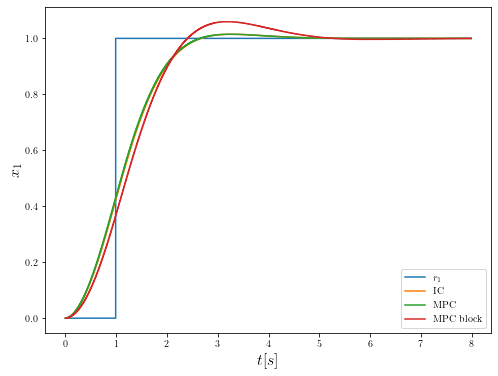

In [3]:
# plot with reference of 1st state and outputs of controlled system
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(8, 6))
plt.step(df_ic['Timestamp'], df_ic['Ref1'], label='$r_1$')
plt.step(df_ic['Timestamp'], df_ic['State1'], label='IC')
plt.step(df_mpc['Timestamp'], df_mpc['State1'], label='MPC')
plt.step(df_mpc_block['Timestamp'], df_mpc_block['State1'], label='MPC block')
plt.xlabel(r'$t[s]$', fontsize=16)
plt.ylabel(r'$x_1$', fontsize=16)
plt.legend()
plt.show()

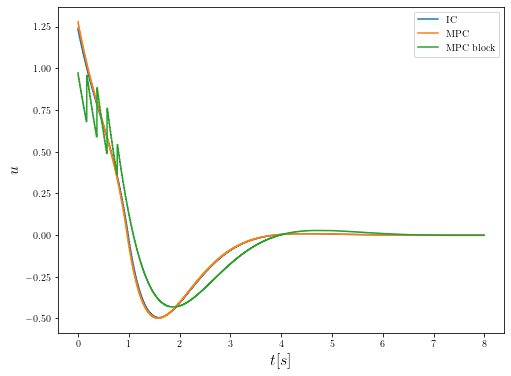

In [4]:
# plot with control actions
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(8, 6))
plt.step(df_ic['Timestamp'], df_ic['Control'], label='IC')
plt.step(df_mpc['Timestamp'], df_mpc['Control'], label='MPC')
plt.step(df_mpc_block['Timestamp'], df_mpc_block['Control'], label='MPC block')
plt.xlabel(r'$t[s]$', fontsize=16)
plt.ylabel(r'$u$', fontsize=16)
plt.legend()
plt.show()

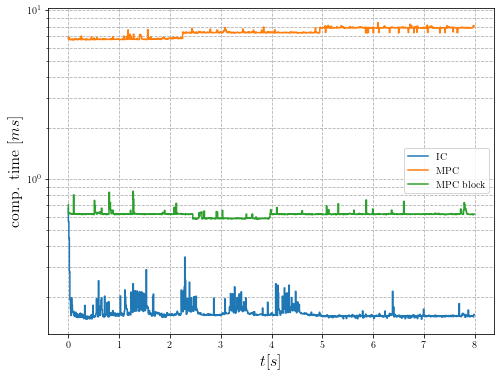

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(8, 6))
plt.step(df_ic['Timestamp'], df_ic['Time Comp.']*1e3, label='IC')
plt.step(df_mpc['Timestamp'], df_mpc['Time Comp.']*1e3, label='MPC')
plt.step(df_mpc_block['Timestamp'], df_mpc_block['Time Comp.']*1e3, label='MPC block')
plt.yscale('log')
plt.grid(True,which="both", linestyle='--')
plt.xlabel(r'$t[s]$', fontsize=16)
plt.ylabel(r'comp. time $[ms]$', fontsize=16)
plt.legend()
plt.show()

In [6]:
for df in [df_ic, df_mpc, df_mpc_block]:
    df['Cost'] = 0
    for i in df.index:
        df.at[i,'Cost'] = df.iloc[i].loc[['Err1','Err2']]@Q1@df.iloc[i].loc[['Err1','Err2']].T + df.iloc[i].loc['Control']*R1*df.iloc[i].loc['Control']

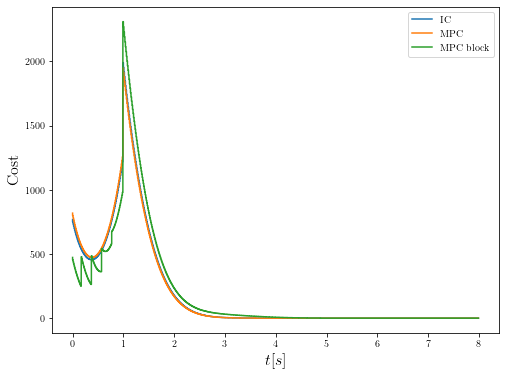

In [7]:
# plot with cost values
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(8, 6))
plt.step(df_ic['Timestamp'], df_ic['Cost'], label='IC')
plt.step(df_mpc['Timestamp'], df_mpc['Cost'], label='MPC')
plt.step(df_mpc_block['Timestamp'], df_mpc_block['Cost'], label='MPC block')
plt.xlabel(r'$t[s]$', fontsize=16)
plt.ylabel(r'Cost', fontsize=16)
plt.legend()
plt.show()

In [8]:
index = ['MPC','MPC block','IC']
columns = ['Cost', 'Time Comp.', 'Max Period']
#data = np.zeros([len(index),len(columns)])
data = []

for df in [df_mpc, df_mpc_block, df_ic]:
    data.append([df['Cost'].sum(),df['Time Comp.'].sum(),df['Time Comp.'].max()*1e3])

df_eval = pd.DataFrame(data,index,columns)

In [9]:
df_eval['Cost perc.'] = (df_eval['Cost']/df_eval.loc['MPC'].at['Cost'])*100
df_eval['Time Comp. perc.'] = (df_eval['Time Comp.']/df_eval.loc['MPC'].at['Time Comp.'])*100
df_eval['Max Period perc.'] = (df_eval['Max Period']/df_eval.loc['MPC'].at['Max Period'])*100
df_eval

,Cost,Time Comp.,Max Period,Cost perc.,Time Comp. perc.,Max Period perc.
MPC,153892,5.916872,8.430958,100.000000,100.000000,100.000000
MPC block,160372,0.494202,0.846148,104.210745,8.352414,10.036197
IC,153808,0.131233,0.670671,99.945416,2.217949,7.954867
